### Collection of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"C:\Users\Admin\Documents\Data Science/bitcoin_price_Training - Training.csv")
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [3]:
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


### Doing data pre-processing or data cleaning

In [5]:
df.shape

(1556, 7)

In [6]:
# checking whether data have null values
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
# checking whether data have duplicate values
df.duplicated().sum()

0

In [8]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [9]:
# Date should be in date-time format for time series analysis ,so it must converted now

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [11]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

### Sorting data from oldest to newest

In [12]:
data = df.sort_index(ascending=False).reset_index().drop("index",axis=1)
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [13]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

### Analysing change in price of stock overtime? 

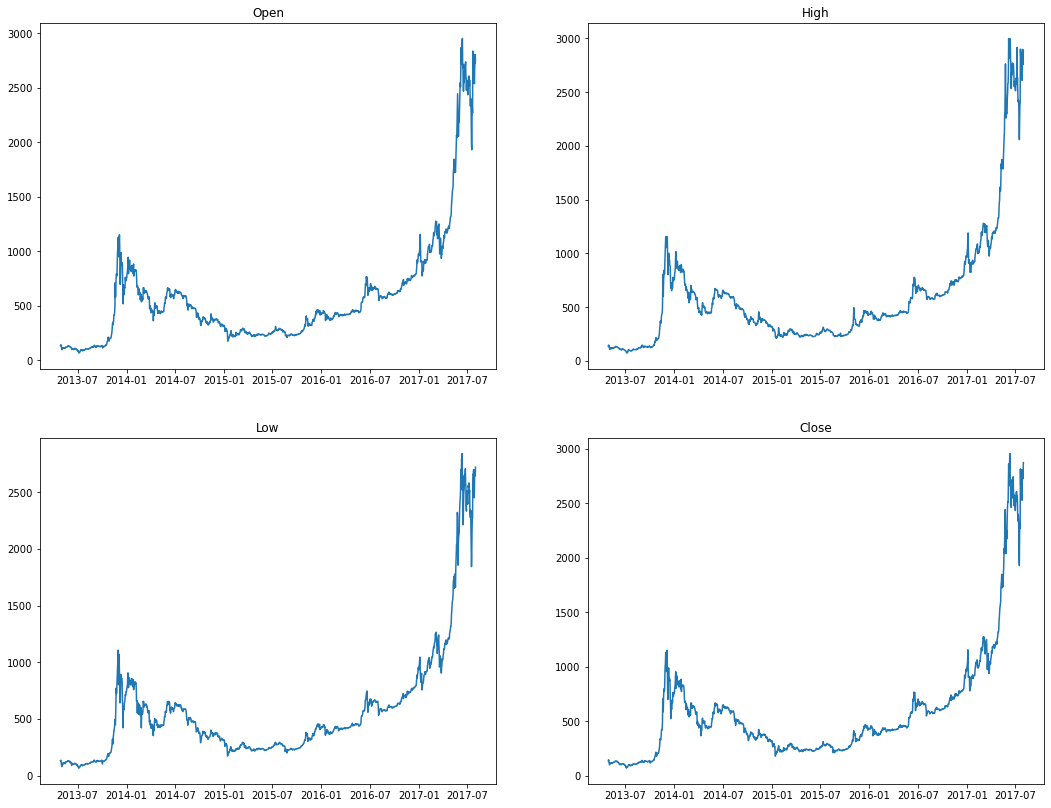

In [14]:
plt.figure(figsize=(18,14)) 

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

plt.show()

### Analysing open,high,low,close value of Bitcoin

In [15]:
# Use candle stick charts

data.shape

(1556, 7)

In [16]:
bitcoin_sample = data[0:50] # Because data is very large so taking the sample.

In [17]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [18]:
init_notebook_mode(connected= True)

In [19]:
trace  = go.Candlestick(x= bitcoin_sample["Date"],
                       high = bitcoin_sample["High"],
                       open = bitcoin_sample["Open"],
                       close = bitcoin_sample["Close"],
                       low = bitcoin_sample["Low"])


In [20]:
candle_data = [trace]
layout = {
    "title":"Bitcoin historical Price",
    "xaxis":{"title":"Date"}
}

In [21]:
fig = go.Figure(data = candle_data,layout=layout)

#fig.update_layout(xaxis_rangeslider_visible = False)

fig.show()

### Analysing closing price (on scale and log scale)

In [22]:
data["Close"]

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<AxesSubplot:>

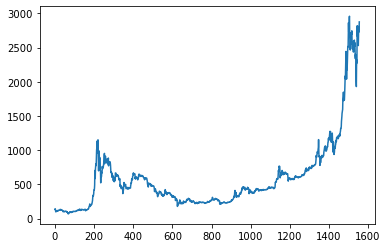

In [23]:
data["Close"].plot()

In [24]:
# Setting date on x-axis

data.set_index("Date", inplace = True)

In [25]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<AxesSubplot:xlabel='Date'>

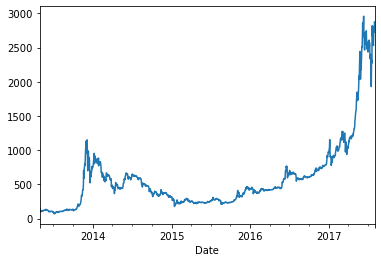

In [26]:
data["Close"].plot()

<AxesSubplot:xlabel='Date'>

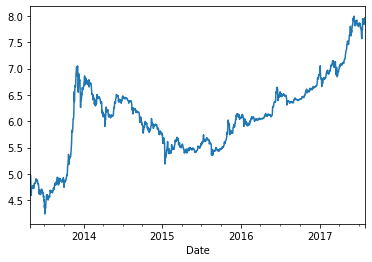

In [27]:
np.log1p(data["Close"]).plot()

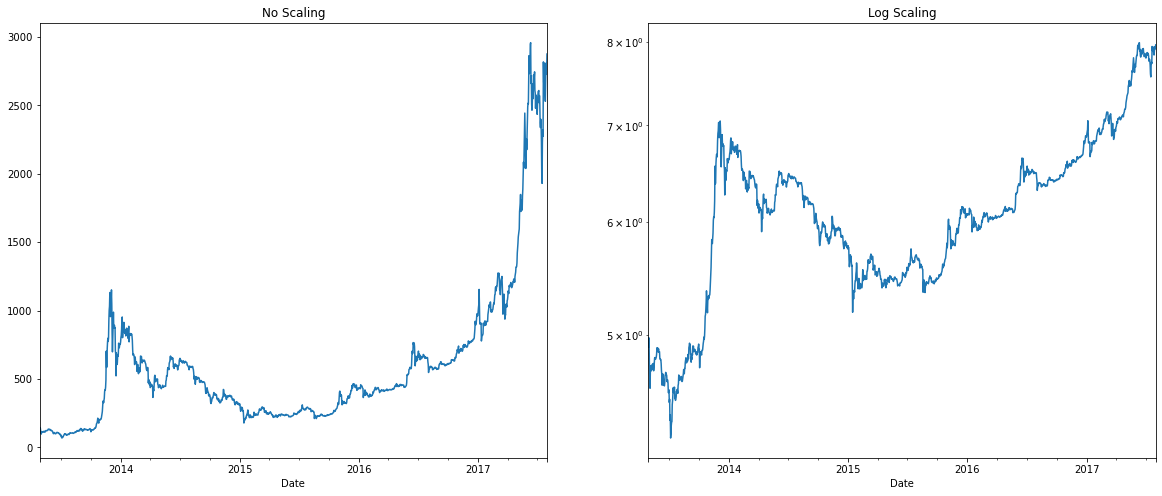

In [28]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
data["Close"].plot()
plt.title("No Scaling")


plt.subplot(1,2,2)
np.log1p(data["Close"]).plot()
plt.title("Log Scaling")
plt.yscale("log")

In [29]:

"""

Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers
"""

'\n\nSome features of the plot above:\n\n    There is an up-ward trend from 2016 for each graph\n    There is no seasonality\n    There are no outliers\n'

### Analyse closing price on Yearly, Quarterly and monthly basis

In [30]:
'''
    Before doing resampling , first u have to make your date feature 'row-index' so that u can resample it in a 
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')
    
'''

"\n    Before doing resampling , first u have to make your date feature 'row-index' so that u can resample it in a \n    a..yearly('Y')  , \n    b..quarterly('Q')   ,\n    c..monthly('M') ,\n    d..weekly basis ('W'), \n    e..Daily_basis('D')  \n    f..minutes ('3T') , \n    g..30 second bins('30S')   ,\n    h..resample('17min')\n    \n"

In [31]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [32]:
## finding avg price of bitcoin on yearly basis ..

data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

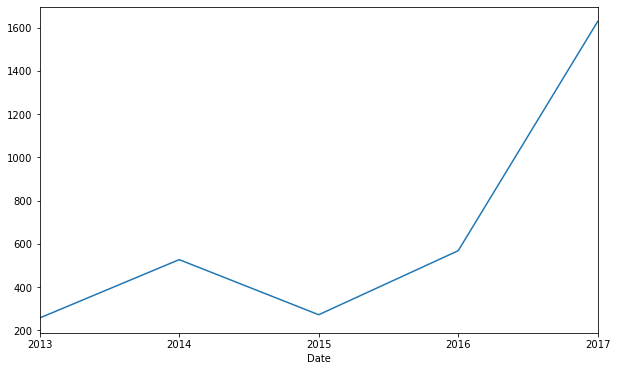

In [33]:
plt.figure(figsize=(10,6))
data['Close'].resample('Y').mean().plot()

In [34]:
data['Close'].resample('Q').mean()

Date
2013-06-30     115.162187
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

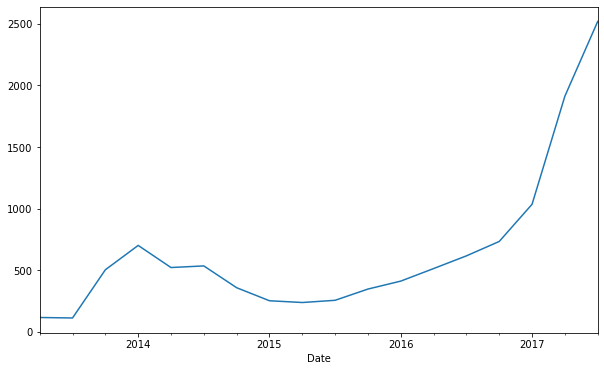

In [35]:
plt.figure(figsize=(10,6))
data['Close'].resample('Q').mean().plot()

In [36]:

data['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<AxesSubplot:xlabel='Date'>

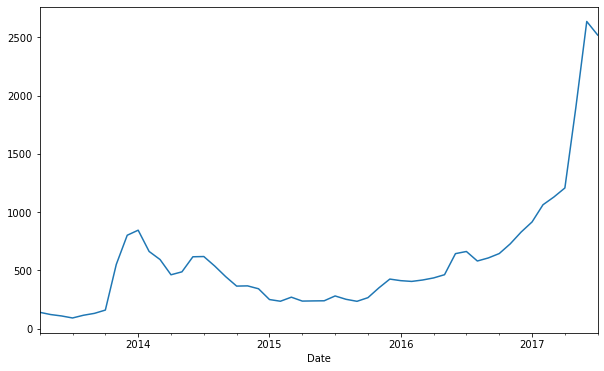

In [37]:
plt.figure(figsize=(10,6))
data['Close'].resample('M').mean().plot()

### Analysing Daily change in closing price of stocks

In [38]:
data["Close"]

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [39]:
data["Closed_priced_pct_change"] = data["Close"].pct_change()*100

In [40]:
data["Closed_priced_pct_change"]

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Closed_priced_pct_change, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

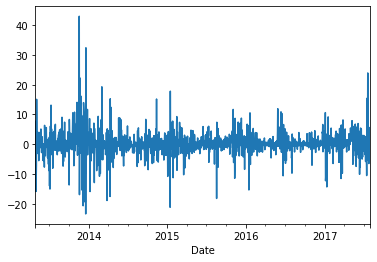

In [41]:
data["Closed_priced_pct_change"].plot()

In [42]:
# If u want to make this pandas plot more interactive u can use cufflinks and Plotly

In [43]:
import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
from plotly import tools
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [44]:
!pip install cufflinks


In [45]:
import cufflinks as cf

In [46]:
cf.go_offline()

In [47]:
data["Closed_priced_pct_change"]

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Closed_priced_pct_change, Length: 1556, dtype: float64

In [48]:
data["Closed_priced_pct_change"].iplot()